Confusion matrix & classification report for K= 1
[[  5   0   2   0   0   2]
 [  0  58   0   1   3   0]
 [  1   1 104   3   0   4]
 [  0   0   3 109   0   2]
 [  0   0   0   2  54   1]
 [  1   1   0   0   6  28]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.97      0.94      0.95        62
           2       0.95      0.92      0.94       113
           3       0.95      0.96      0.95       114
           4       0.86      0.95      0.90        57
           5       0.76      0.78      0.77        36

    accuracy                           0.92       391
   macro avg       0.87      0.85      0.86       391
weighted avg       0.92      0.92      0.92       391

Confusion matrix & classification report for K= 2
[[  5   0   2   1   0   1]
 [  0  59   0   1   2   0]
 [  2   1 106   1   0   3]
 [  2   0   3 109   0   0]
 [  1   4   0   1  51   0]
 [  2   1   2   4   5  22]]
              precision    reca

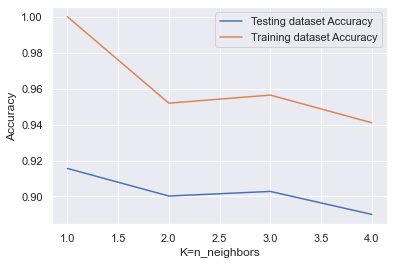

In [5]:
import os
import pandas as pd
import tensorflow
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed


from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

merged_data = pd.read_csv('dataset_6classses_rms.csv')
merged_data = merged_data.drop(merged_data.columns[0], axis = 1)
um_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)

num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

dataset = merged_data.values
scaler = StandardScaler()
X = dataset[:,0:8].astype(float)
X = scaler.fit_transform(X)
Y = dataset[:,8].astype(int)


# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

neighbors = np.arange(1, 5)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    cm_knn = confusion_matrix(y_test, y_pred)
    print('Confusion matrix & classification report for K=', k)
    print(cm_knn)
    print(classification_report(y_test, y_pred))
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('K=n_neighbors')
plt.ylabel('Accuracy')
plt.show()
